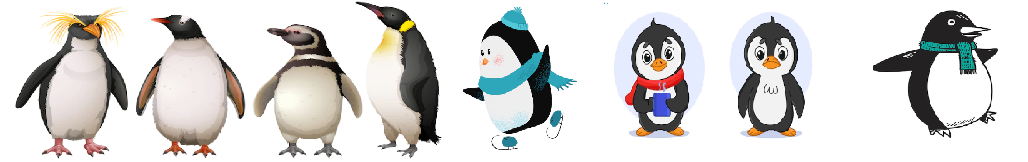

# Exploratory Data Analysis of Penguins with various Visualizations

# https://www.kaggle.com/datasets/larsen0966/penguins

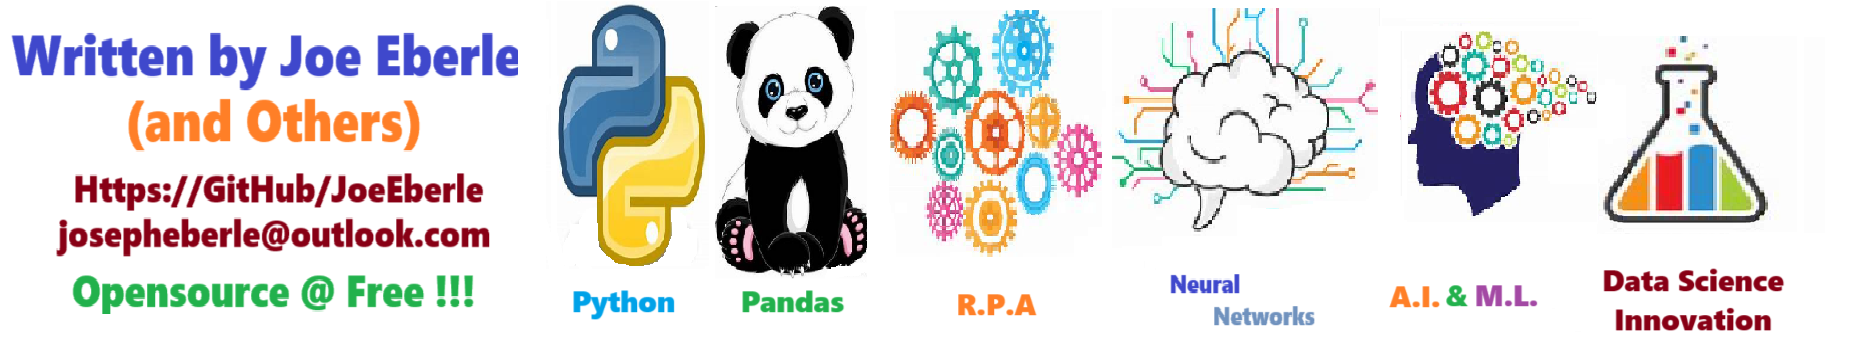

## Required Setup Step 0 - Install and Import all necessary Libraries


In [1]:
first_install = False 
if first_install:
    !pip install ydata-profiling
    !pip install Pysttx3
    !pip install seaborn
    !pip install matplotlib
    !pip install plotly    
 

In [2]:
# Import Libraries for Spreadsheet Automation 
import pandas as pd
import datetime as dt
from datetime import date
import os, glob, time
from platform import python_version
import seaborn as sns
from matplotlib import pyplot as plt 

# Read in the Data Set

In [3]:
# # df_penguins = sns.load_dataset("penguins")
# df_penguins = pd.read_csv("https://raw.githubusercontent.com/JoeEberle/datasets/main/penguins.csv")


In [4]:
df_penguins = pd.read_csv("penguins.csv")

In [5]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [6]:
sns.set_style('darkgrid')

## Drop any incomplete data rows

In [7]:
df_penguins = df_penguins.dropna()

## How Big is the Data ??? 

In [8]:
print(f"The number of rows in this data is {df_penguins.shape[0]} and Number of columns {df_penguins.shape[1]} ")

The number of rows in this data is 333 and Number of columns 8 


In [9]:
print(df_penguins.info())
df_penguins.columns

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB
None


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

# How many data rows of each  species?

In [10]:
df_penguins['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<AxesSubplot: title={'center': 'How any of each  species?'}, xlabel='species'>

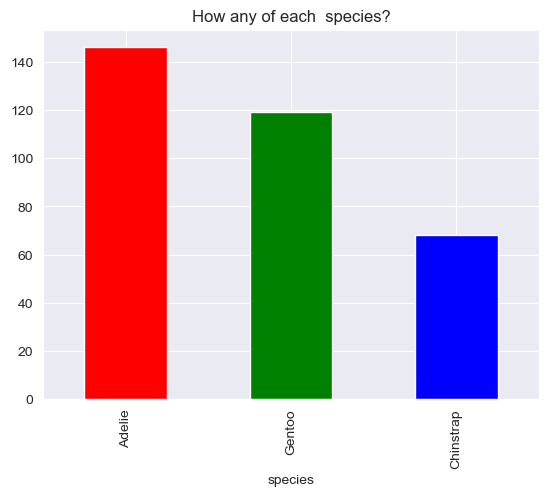

In [11]:
df_penguins['species'].value_counts().plot(kind='bar', color=['r','g','b'], title = 'How any of each  species?')

# How many islands are in the data set ?

<AxesSubplot: title={'center': 'How many row of each island?'}, xlabel='island'>

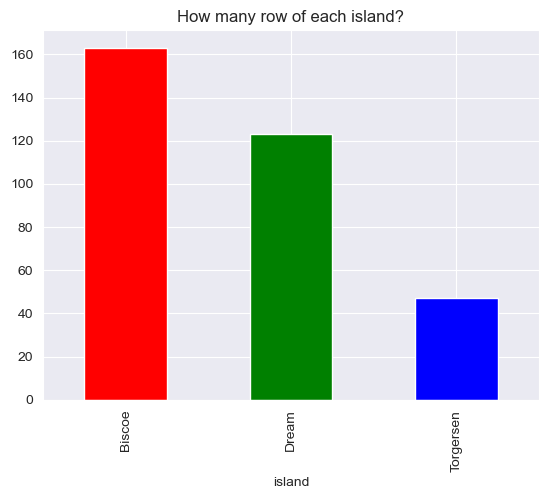

In [12]:
df_penguins['island'].value_counts().plot(kind='bar', color=['r','g','b'], title = 'How many row of each island?')

# What is the body mass (grams) of each species?

<AxesSubplot: title={'center': 'How many of each  species?'}, xlabel='island'>

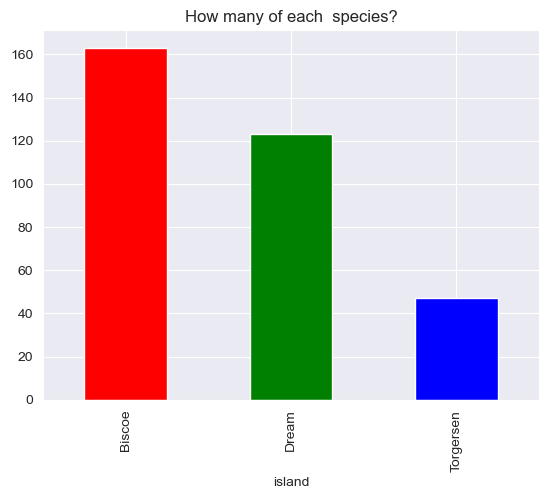

In [13]:
df_penguins['island'].value_counts().plot(kind='bar',  color=['r','g','b'], title = 'How many of each  species?')

# How many Penguins of each gender ? 

<AxesSubplot: title={'center': 'How many of each  species?'}, ylabel='count'>

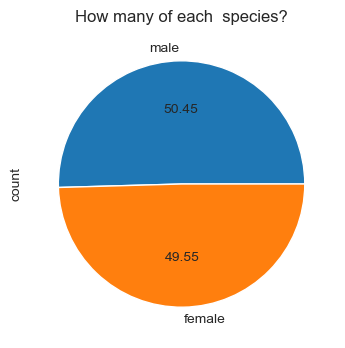

In [14]:
df_penguins['sex'].value_counts().plot(kind='pie', autopct='%.2f', figsize=[4,4], title = 'How many of each  species?')

# What is the body mass (grams) of each species?

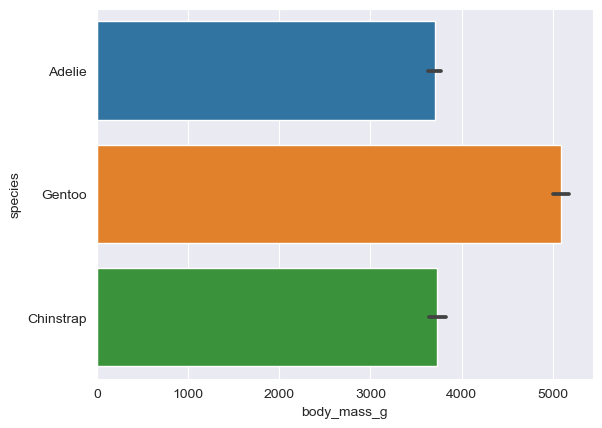

In [15]:
sns.barplot(x='body_mass_g', y='species',  data = df_penguins);

# Display Correlation Between 2 Independent Features

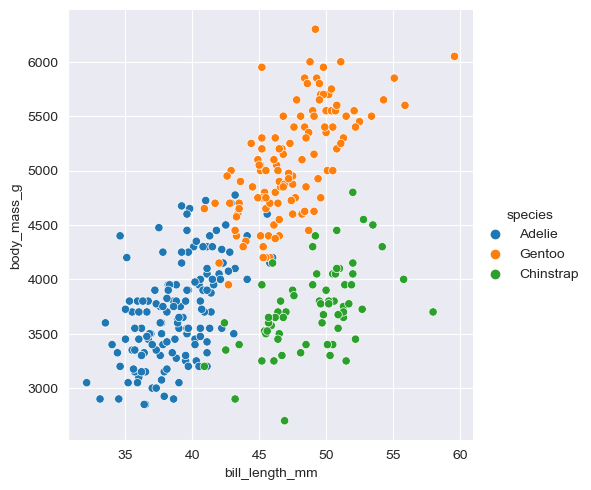

In [16]:
sns.relplot(data=df_penguins, x='bill_length_mm', y='body_mass_g',  hue='species')

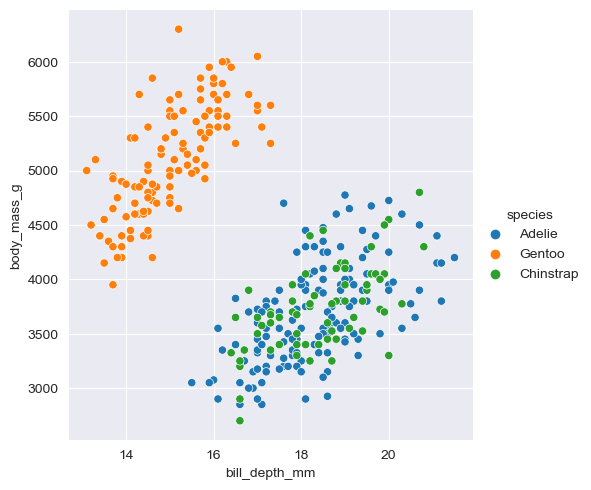

In [17]:
sns.relplot(data=df_penguins, x='bill_depth_mm', y='body_mass_g',  hue='species')

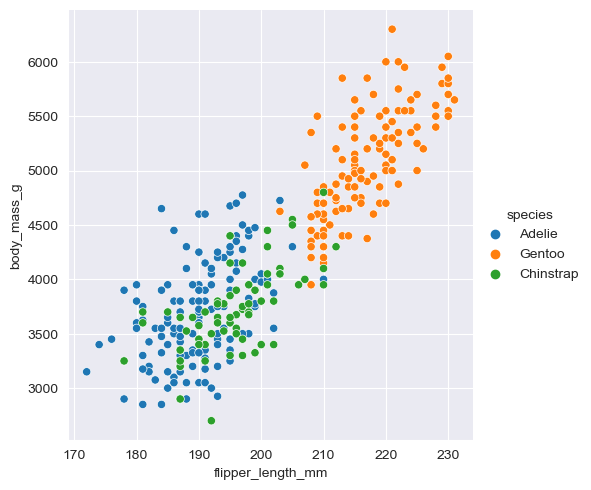

In [18]:
sns.relplot(data=df_penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

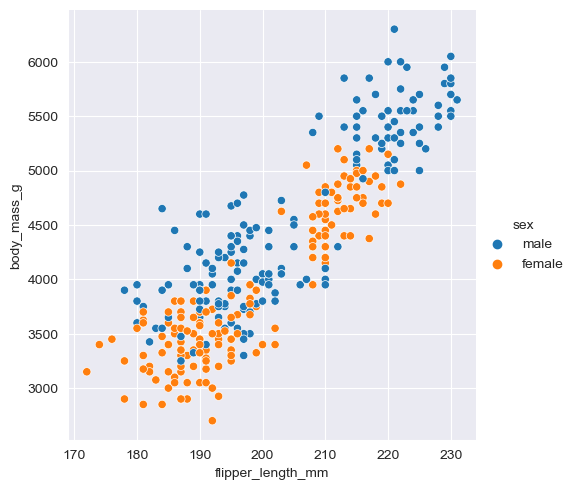

In [19]:
sns.relplot(data=df_penguins, x='flipper_length_mm', y='body_mass_g', hue='sex')

# Display Correlation Between ALL Independent Features by SPECIES

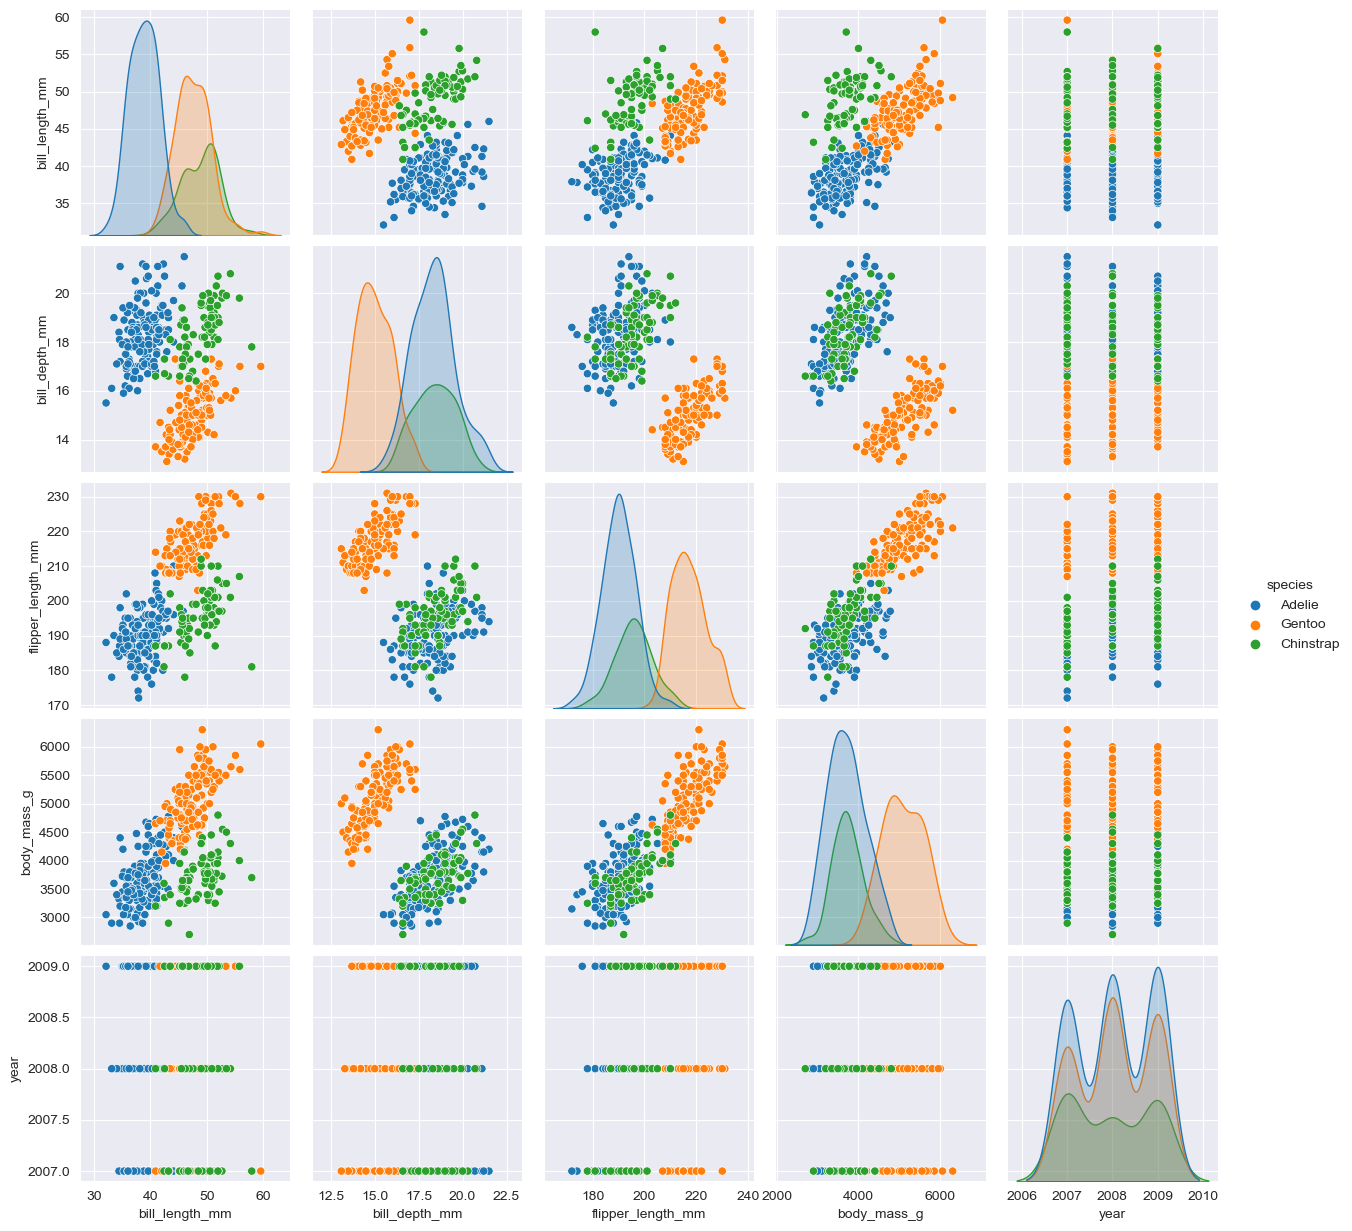

In [20]:
sns.pairplot(data=df_penguins, hue='species')

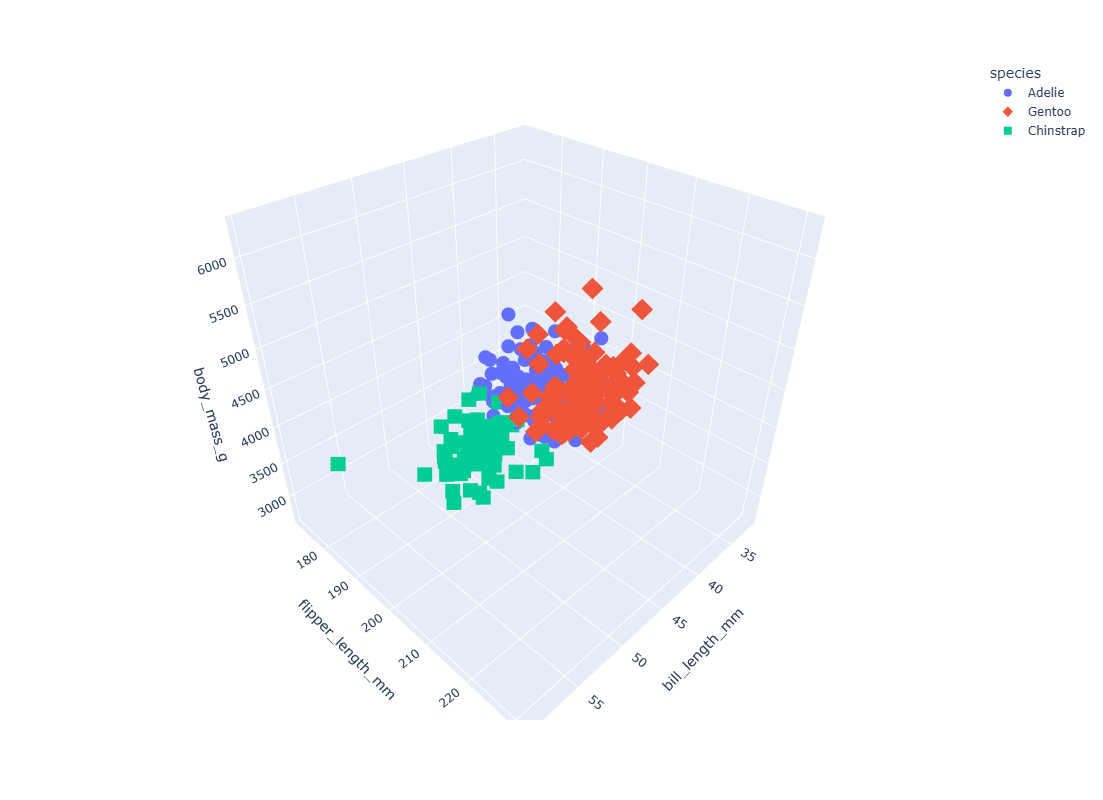

In [21]:
import plotly.express as px

fig = px.scatter_3d(df_penguins, x='bill_length_mm', y='flipper_length_mm', z='body_mass_g',
                    color='species', symbol='species')

# Update the layout to make the plot larger
fig.update_layout(width=1000, height=800)  # Adjust the width and height as needed


fig.show()

# Optional Display a Correlation Heatmap

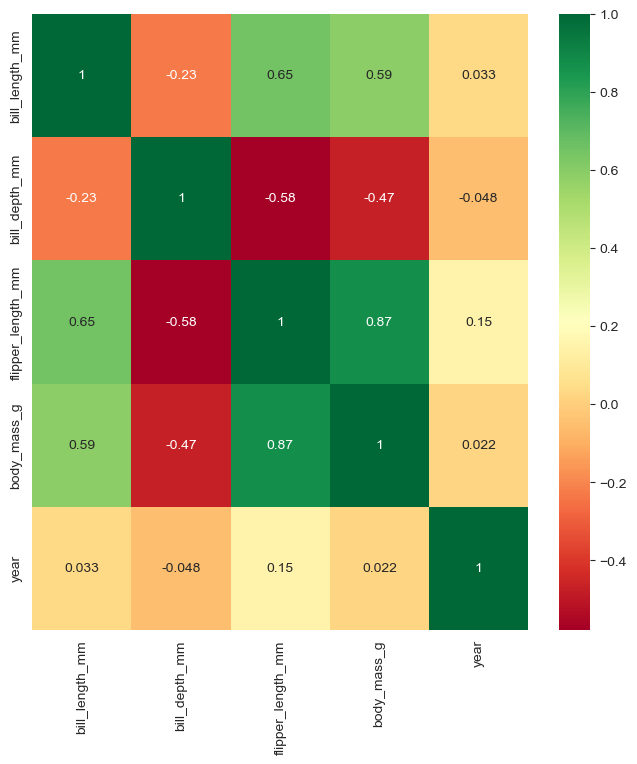

In [22]:
def display_Correlation_heatmap(df):
    correlation_matrix = df.corr(numeric_only=True)     #establish a correlation matrix for all fields
    top_correlation_features = correlation_matrix.index
    plt.figure(figsize=(8,8))
    g=sns.heatmap(df[top_correlation_features].corr(),annot=True,cmap="RdYlGn")
    
    
creating_correlation_heatmap = True
if creating_correlation_heatmap:
    display_Correlation_heatmap(df_penguins)

In [23]:
!pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

# Optionally perform Descriptive Statistics - Send to Browser

In [24]:
displaying_descriptive_statistics = True
    
if displaying_descriptive_statistics:
    import ydata_profiling # provides descriptive statistics in html for any dataframe
    import display_descriptive as dd
    dd.display_descriptive_statistics(dd.get_descriptive_statistics(df_penguins,'Penguins'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Outputting descriptive statistics profile to: C:\working_directory\html\Penguinsdescriptive_statistics_profile.html


# Display Correlation Between ALL Independent Features by ISLAND

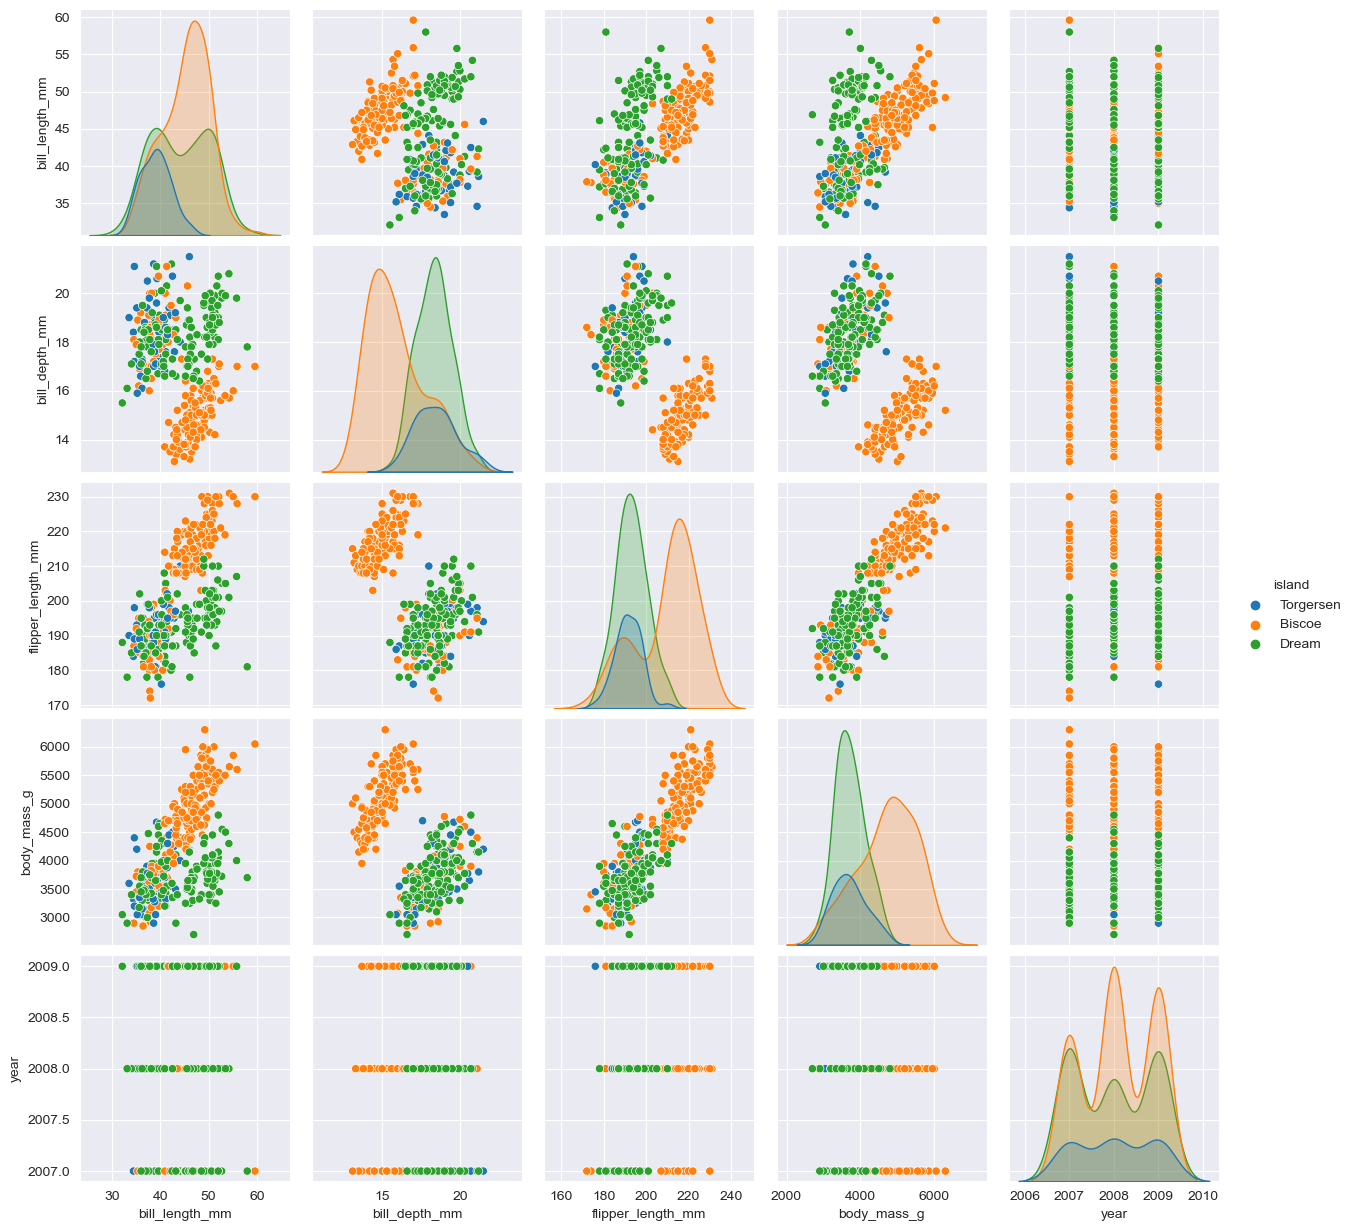

In [25]:
sns.pairplot(data=df_penguins, hue='island')

# Adding Value Count Labels to Bars 

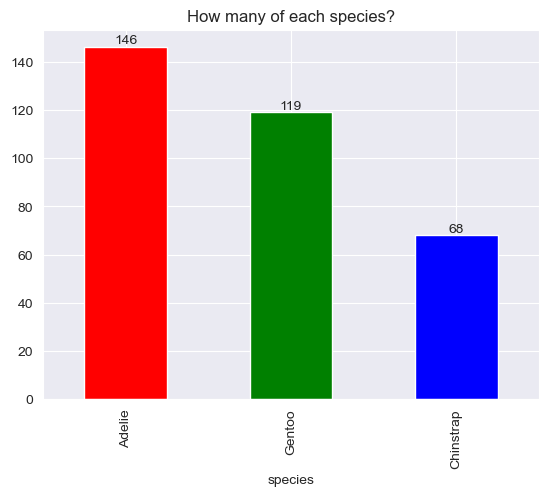

In [26]:
import matplotlib.pyplot as plt

# Get value counts for the 'species' column
species_counts = df_penguins['species'].value_counts()
# Create a bar plot
ax = species_counts.plot(kind='bar', color=['r', 'g', 'b'], title='How many of each species?')
# Add value counts as text labels on top of the bars
for i, count in enumerate(species_counts):
    ax.text(i, count + 0.2, str(count), ha='center', va='bottom', fontsize=10)
# Show the plot
plt.show()

# One hot encoding  using PANDAS - DONT DO THIS !!!!

In [27]:
# Select columns to one-hot encode
columns_to_encode = ['species', 'island', 'sex']

# Perform one-hot encoding
df_penquins_one_hot = pd.get_dummies(df_penguins, columns=columns_to_encode)

# Display the encoded DataFrame
df_penquins_one_hot.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0            39.1           18.7              181.0       3750.0  2007   
1            39.5           17.4              186.0       3800.0  2007   
2            40.3           18.0              195.0       3250.0  2007   
4            36.7           19.3              193.0       3450.0  2007   
5            39.3           20.6              190.0       3650.0  2007   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0            True              False           False          False   
1            True              False           False          False   
2            True              False           False          False   
4            True              False           False          False   
5            True              False           False          False   

   island_Dream  island_Torgersen  sex_female  sex_male  
0         False              True       False      True  
1         False              True        True     False  
2         False              True        True     False  
4         False              True        True     False  
5         False              True       False      True

# One hot encoding  using SCI-KIT Learn - DO THIS INSTEAD !!!!

In [28]:
from sklearn.preprocessing import LabelEncoder

df = df_penguins

# Assuming df is your DataFrame
columns_to_encode = ['species', 'island', 'sex']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
df_penquins_one_hot = df
df_penquins_one_hot.head()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2            39.1           18.7              181.0   
1        0       2            39.5           17.4              186.0   
2        0       2            40.3           18.0              195.0   
4        0       2            36.7           19.3              193.0   
5        0       2            39.3           20.6              190.0   

   body_mass_g  sex  year  
0       3750.0    1  2007  
1       3800.0    0  2007  
2       3250.0    0  2007  
4       3450.0    0  2007  
5       3650.0    1  2007

# Optional REDO Correlation Heatmap checking for MultiColinearity

# Checks if Categorical Columns are MultiColinear 

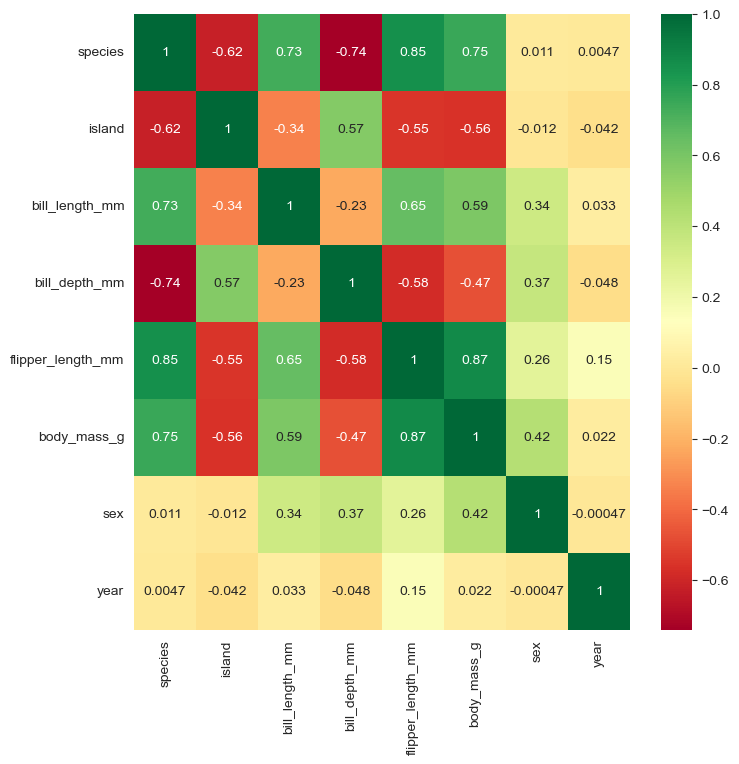

In [29]:
creating_correlation_heatmap = True
if creating_correlation_heatmap:
    display_Correlation_heatmap(df_penquins_one_hot)

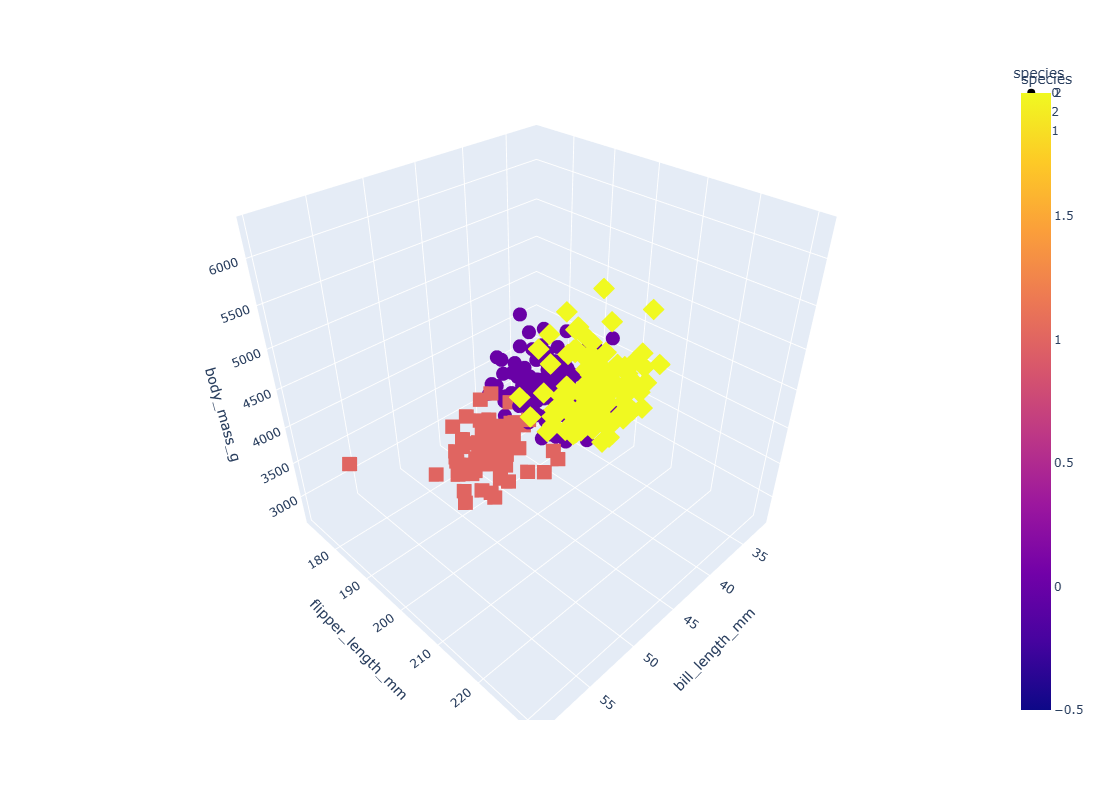

In [30]:
import plotly.express as px

fig = px.scatter_3d(df_penguins, x='bill_length_mm', y='flipper_length_mm', z='body_mass_g',
                    color='species', symbol='species')

# Update the layout to make the plot larger
fig.update_layout(width=1000, height=800)  # Adjust the width and height as needed


fig.show()

# Optional .git commands

In [31]:
# git init
# git remote add origin https://github.com/JoeEberle/penguins.git
# git branch -M main
# git push -u origin main

# git add .
# git commit -m "first commit"
# git branch -M main
# git remote add origin https://github.com/JoeEberle/penguins.git
# git push -u origin main